In [15]:
using Plots, Polynomials, Interpolations

┌ Info: Precompiling Interpolations [a98d9a8b-a2ab-59e6-89dd-64a1c18fca59]
└ @ Base loading.jl:1273


In [249]:
x_lower_bound = 1
x_step = 1
x_upper_bound = 10
f1(x) = sin(3x - 10) / (1 + (x - 10)^2)
points = [(x, f1(x)) for x in x_lower_bound:x_step:x_upper_bound]

function get_coords(points)
    x_coords = [x for (x, y) in points]
    y_coords = [y for (x, y) in points]
    return x_coords, y_coords
end
x_coords, y_coords = get_coords(points)

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [-0.00801203169169255, 0.011643115312429664, -0.01682941969615793, 0.02457560613042383, -0.03688170287165917, 0.05819754391902246, -0.09999902065507035, 0.19812147113897408, -0.4806987459397784, 0.9129452507276277])

In [250]:
function get_l(k, x, x_coords)
    output = 1
    xk = x_coords[k]
    for xi in x_coords
        if xi != xk
            output *= (x - xi) / (xk - xi)
        end
    end
    return output
end

function lagrange_pol_value(x, points)
    x_coords, y_coords = get_coords(points)
    output = 0
    for k in 1:length(x_coords)
        output += get_l(k, x, x_coords) * y_coords[k]
    end
    return output
end

lagrange_pol_value (generic function with 1 method)

In [251]:
function get_f(lower_bound, upper_bound, y_coords)
    if lower_bound == upper_bound
        return y_coords[lower_bound]
    end
    denominator = get_f(lower_bound + 1, upper_bound, y_coords) - get_f(lower_bound, upper_bound -1, y_coords)
    numeretor = y_coords(upper_bound) - y_coords(lower_bound)
    return denominator / numerator
end

function divided_difference_pol_value(x, points)
    x_coords, y_coords = get_coords(points)
    output = y_coords[1]
    for k in 2:length(x_coords)
        multiplier = 1
        for i in 1:(k - 1)
            multiplier *= x - x_coords[i]
        output += 

LoadError: syntax: incomplete: premature end of input

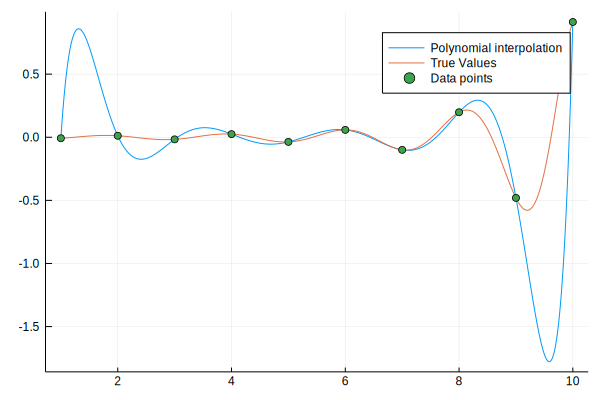

In [252]:
density = 0.01
to_plot = x_lower_bound:density:x_upper_bound

fit1 = polyfit(x_coords, y_coords)
plot(to_plot, [fit1(x) for x in to_plot], label="Polynomial interpolation")
plot!(to_plot, [f1(x) for x in to_plot], label="True Values")
scatter!(x_coords, y_coords, label="Data points")

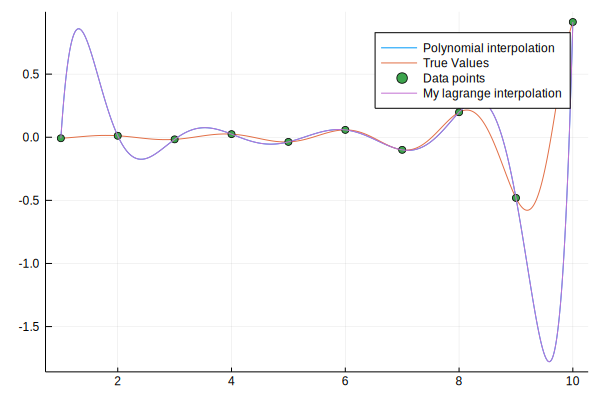

In [253]:
plot!(to_plot, [lagrange_pol_value(x, points) for x in to_plot], label="My lagrange interpolation")

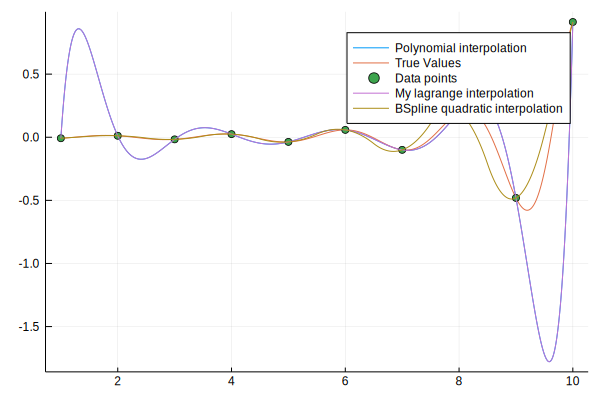

In [254]:
itp = interpolate(y_coords, BSpline(Quadratic(Line(OnCell()))))
y_spline = [itp(x) for x in to_plot]
plot!(to_plot, y_spline, label="BSpline quadratic interpolation")

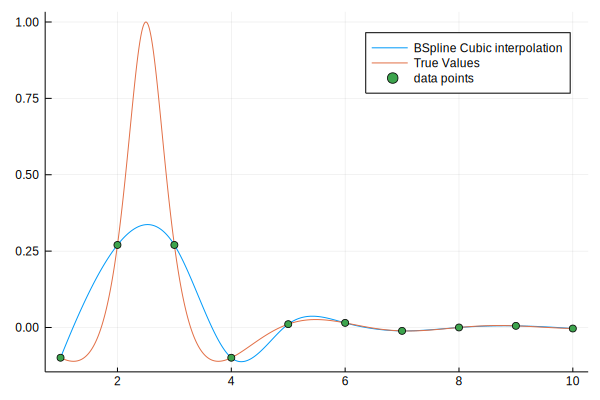

In [247]:
f2(x) = cos(2x - 5) / (1 + (2x - 5)^2)
points2 = [(x, f2(x)) for x in x_lower_bound:x_step:x_upper_bound]

x_coords2, y_coords2 = get_coords(points2)

itp = interpolate(y_coords2, BSpline(Cubic(Line(OnCell()))))
y_spline = [itp(x) for x in to_plot]
plot(to_plot, y_spline, label="BSpline Cubic interpolation")
plot!(to_plot, [f2(x) for x in to_plot], label="True Values")
scatter!(x_coords2, y_coords2, label="data points")

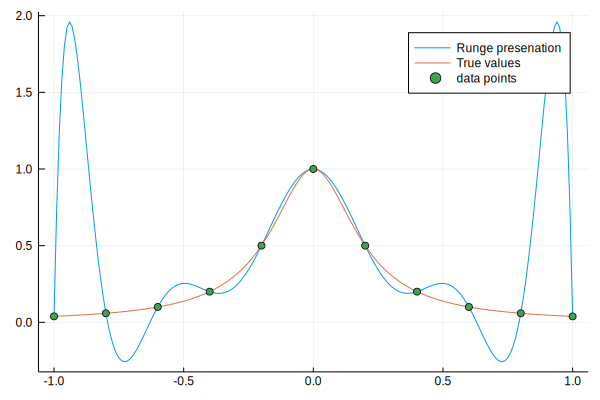

In [225]:
runge_xlb = -1
runge_s = 0.2
runge_xup = 1

runge_f(x) = 1 / (1 + 25 * x^2)
runge_p = [(x, f(x)) for x in runge_xlb:runge_s:runge_xup]

runge_x, runge_y = get_coords(runge_p)

runge_fit = polyfit(runge_x, runge_y)

runge_tp = -1:0.01:1

plot(runge_tp, [runge_fit(x) for x in runge_tp], label="Runge presenation")
plot!(runge_tp, [runge_f(x) for x in runge_tp], label="True values")
scatter!(runge_x, runge_y, label="data points")